In [1]:
import sys; sys.path.insert(0,'../../../mySoftware/MySoftwarePackage/mac'); from plot_tools import *
anafiles_dir = '/Users/erezcohen/Desktop/DensityFluctuations/AnaFiles/csv_files'
%matplotlib inline
from matplotlib.ticker import NullFormatter

In [2]:
generic = lambda x: ast.literal_eval(x)

# load data

In [5]:
file_names = ['c12-ico0-50k']#,'c12-ico6-10k_rd200']
labels = ['$^{12}$C no correlations','$^{12}$C with correlations']

In [10]:
distances = dict()
for file_name,label in zip(file_names,labels):
    distances[label] = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/'+file_name+'_NNdistances.csv'                      
                                   ,converters={'pp distances':generic,'nn distances':generic
                                                ,'np distances':generic,'NP distances':generic})
    print len(distances[label]),'distances in ',label

10000 distances in  $^{12}$C no correlations


In [15]:
# read an array of floating-point numbers from the csv file...
def get_array_from_list_cell(df=None,variable=None):
    array = []
    for x in np.concatenate([(df[variable]).ravel()]):
        if type(x)==type([0.1,0.2]): # just an array of floating-point numbers
            for x_object in x:
                if x_object!=-9999: array.append(x_object)
        else:
            if x!=-9999: array.append(x)
    return array

In [34]:
array = get_array_from_list_cell(df=sample,variable='np distances')
array
# plt.hist( array , bins=bins ,color='blue', histtype='step',linewidth=2)

[4.0881571769714355,
 3.019019842147827,
 4.700308799743652,
 3.4128365516662598,
 2.777029514312744,
 5.687652587890625,
 2.59800124168396,
 1.0157217979431152,
 3.8555285930633545,
 2.9560911655426025,
 0.8468134999275208,
 2.213204860687256,
 2.4757614135742188,
 1.6587374210357666,
 3.3696272373199463,
 3.681863784790039,
 1.937464714050293,
 4.501238822937012,
 2.1807992458343506,
 4.977718830108643,
 3.60119891166687,
 1.2904454469680786,
 2.7668638229370117,
 1.6422417163848877,
 2.855210542678833,
 2.281644821166992,
 2.9563934803009033,
 4.758277416229248,
 3.5231223106384277,
 1.5350133180618286,
 1.845192790031433,
 1.603145956993103,
 2.5876920223236084,
 3.1110358238220215,
 2.966384172439575,
 1.8625469207763672,
 3.575692653656006,
 4.5647053718566895,
 2.4495623111724854,
 4.37377405166626,
 2.9749135971069336,
 5.375495433807373,
 2.7315335273742676,
 4.254825592041016,
 4.363775253295898,
 4.65628719329834,
 2.759840726852417,
 2.5358734130859375,
 4.711276054382324,


$^{12}$C no correlations


ValueError: color kwarg must have one color per dataset

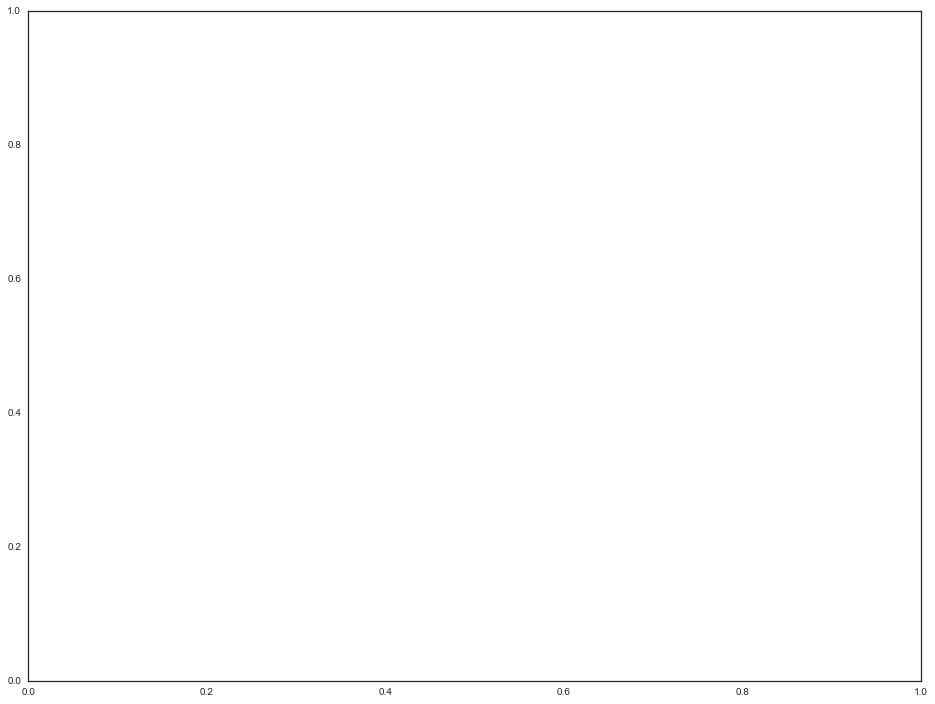

In [21]:
# number of pairs as a function of the distance form the center
label = labels[0]
sample = distances[label]
bins = np.linspace(0,6,41)
xlim = (np.min(bins),np.max(bins))

print label 
d = 1.0 # fm
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(1,1,1)
for i,(pair_type,color) in enumerate(zip(['NN']#,'nn','np','pp','NN']
                                         ,['purple','teal','royalblue','gold'])):
    array = get_array_from_list_cell(df=sample,variable=pair_type+' distances')
    plt.hist( array , bins=bins,color=color, histtype='step',linewidth=2)# ,normed=1
    plt.plot([0,0],[0,0],label=pair_type,linewidth=4,color=color)        
set_axes(ax,'',do_add_grid=True)
plt.legend(fontsize=25)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(xlim)
plt.tight_layout()

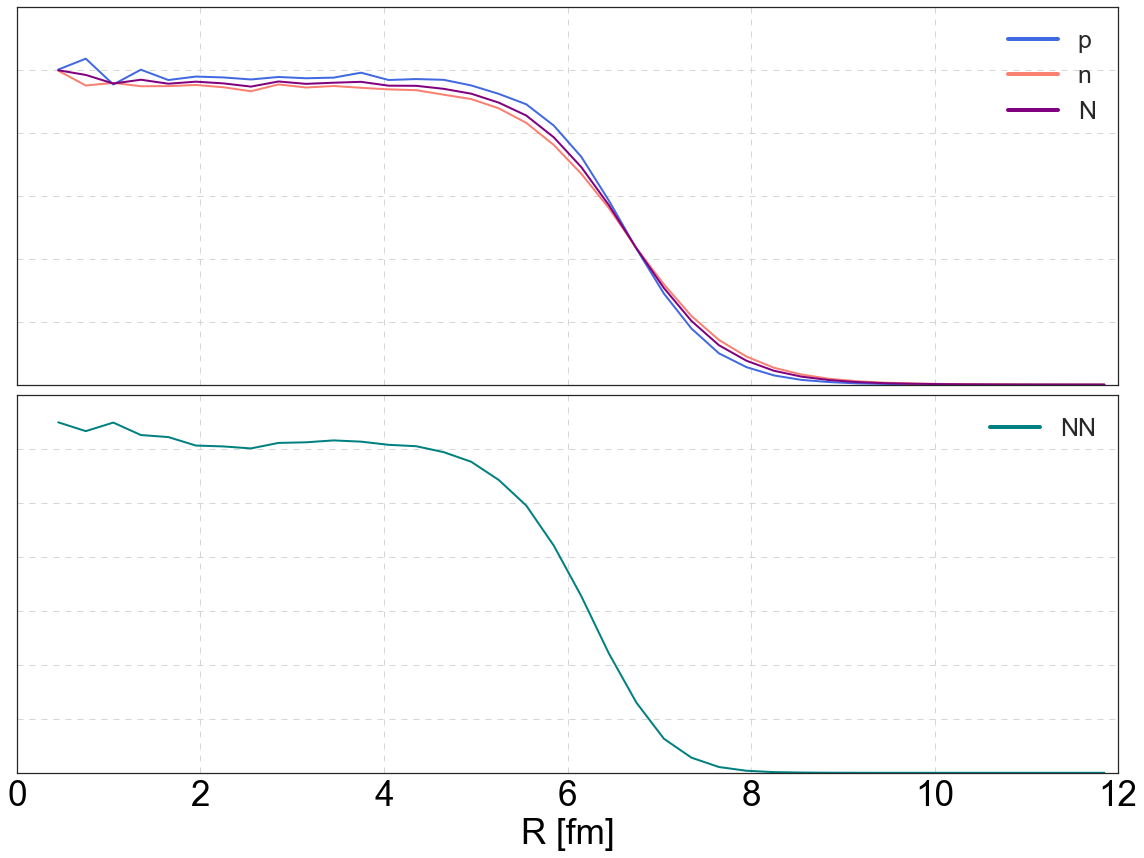

In [24]:
# now, to get the charge distribution - we need to divide by R2
# a plot to send Massi
bins = np.linspace(0,12,41)
xlim = (np.min(bins),np.max(bins))

d = 1.0 # fm
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(2,1,1)
for i,(particle_type,color) in enumerate(zip(['p','n','N']
                                             ,['royalblue','salmon','purple'])):
    array = get_array_from_list_cell(df=sample,variable=particle_type+' distances')
    h,Rbins=np.histogram( array , bins=bins ,normed=1 )
    R = Rbins[1:]-0.5*(Rbins[1]-Rbins[0])
    h_R2 = h/np.square(R)
    plt.plot( R[1:] , h_R2[1:] ,color=color, linewidth=2)
    
    plt.plot([0,0],[0,0],label=particle_type,linewidth=4,color=color)        
set_axes(ax,'',do_add_grid=True)
plt.legend(fontsize=25)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(xlim)

    
ax=fig.add_subplot(2,1,2)
for i,(pair_type,color) in enumerate(zip(['NN']
                                         ,['teal'])):
    array = get_array_from_list_cell(df=sample,variable=pair_type+' < %.1f fm'%d)
    h,Rbins=np.histogram( array , bins=bins ,normed=1 )
    R = Rbins[1:]-0.5*(Rbins[1]-Rbins[0])
    h_R2 = h/np.square(R)
    plt.plot( R[1:] , h_R2[1:] ,color=color, linewidth=2)
    plt.plot([0,0],[0,0],label=pair_type,linewidth=4,color=color)        
set_axes(ax,'R [fm]',fontsize=35,do_add_grid=True)
plt.legend(fontsize=25)
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(xlim)
plt.tight_layout()